In [1]:
import pickle
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def load_cifar_batch(filename):
    """ 从单个 CIFAR 数据文件加载一个批次的数据 """
    with open(filename, 'rb') as f:
        data_dict = pickle.load(f, encoding='latin1')
        X = data_dict['data']
        Y = data_dict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_cifar10(data_dir):
    """ 从所有 CIFAR 文件加载整个数据集 """
    xs = []
    ys = []
    for batch in range(1, 6):
        f = os.path.join(data_dir, f'data_batch_{batch}')
        X, Y = load_cifar_batch(f)
        xs.append(X)
        ys.append(Y)
    X_train = np.concatenate(xs)
    Y_train = np.concatenate(ys)
    X_test, Y_test = load_cifar_batch(os.path.join(data_dir, 'test_batch'))
    return X_train, Y_train, X_test, Y_test

# 指定数据集路径
data_dir = "/Users/oliviagarbo/Documents/Deep learning/assignment 2/cifar-10-batches-py"

# 加载数据
X_train, Y_train, X_test, Y_test = load_cifar10(data_dir)

# 打印数据形状以验证加载成功
print("训练集图像数据形状:", X_train.shape)
print("训练集标签数据形状:", Y_train.shape)
print("测试集图像数据形状:", X_test.shape)
print("测试集标签数据形状:", Y_test.shape)


训练集图像数据形状: (50000, 3, 32, 32)
训练集标签数据形状: (50000,)
测试集图像数据形状: (10000, 3, 32, 32)
测试集标签数据形状: (10000,)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.2579 - loss: 2.0023 - val_accuracy: 0.4694 - val_loss: 1.5065
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.4187 - loss: 1.5828 - val_accuracy: 0.5334 - val_loss: 1.3360
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.4681 - loss: 1.4563 - val_accuracy: 0.5548 - val_loss: 1.2585
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.5001 - loss: 1.3833 - val_accuracy: 0.5941 - val_loss: 1.1624
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.5332 - loss: 1.2983 - val_accuracy: 0.6252 - val_loss: 1.0991
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.5512 - loss: 1.2571 - val_accuracy: 0.6356 - val_loss: 1.0512
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.5647 - loss: 1.2151 - val_accuracy: 0.6426 - val_loss: 1.0398
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.5873 - loss: 1.1643 - 

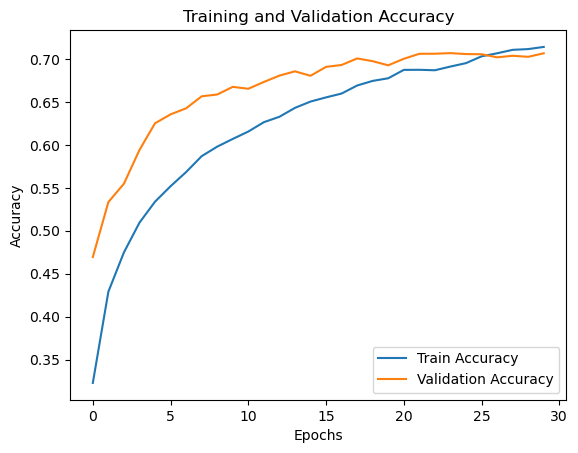

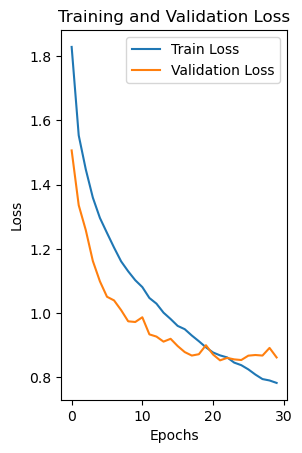

In [3]:
#

# 数据预处理
X_train = X_train.transpose(0, 2, 3, 1) / 255.0
X_test = X_test.transpose(0, 2, 3, 1) / 255.0
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

# 定义简单的 CNN 模型
def create_simple_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 创建和训练模型
model = create_simple_cnn()
history = model.fit(X_train, Y_train, epochs=30, batch_size=128, validation_data=(X_test, Y_test))

# 绘制准确率曲线
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# 损失曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()